<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Local outlier factor

Confusion Matrix:
[[ 14  36]
 [ 39 961]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.26      0.28      0.27        50
         1.0       0.96      0.96      0.96      1000

    accuracy                           0.93      1050
   macro avg       0.61      0.62      0.62      1050
weighted avg       0.93      0.93      0.93      1050



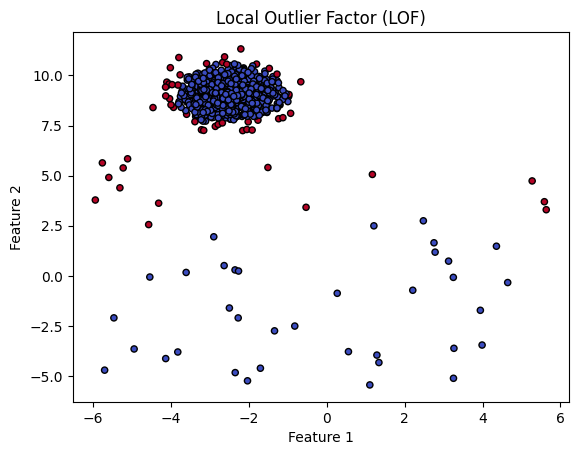

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=1000, centers=1, cluster_std=0.60, random_state=42)
np.random.seed(42)
X = np.concatenate([X, np.random.uniform(low=-6, high=6, size=(50, 2))], axis=0)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

y_pred_binary = (y_pred == -1).astype(int)

ground_truth = np.ones(len(X))
ground_truth[-50:] = -1

print("Confusion Matrix:")
print(confusion_matrix(ground_truth, y_pred))

print("\nClassification Report:")
print(classification_report(ground_truth, y_pred))

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], c=y_pred_binary, cmap='coolwarm', edgecolor='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Elliptic Envelope

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import classification_report, confusion_matrix

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-6, high=6, size=(30, X.shape[1]))
X = np.concatenate([X, X_outliers], axis=0)

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

model = EllipticEnvelope(contamination=0.1, random_state=42)
model.fit(X_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Confusion Matrix (Train):")
print(confusion_matrix(np.ones(len(X_train)), y_pred_train))

print("\nClassification Report (Train):")
print(classification_report(np.ones(len(X_train)), y_pred_train))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(np.ones(len(X_test)), y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(np.ones(len(X_test)), y_pred_test))


Confusion Matrix (Train):
[[  0   0]
 [ 23 208]]

Classification Report (Train):
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.90      0.95       231

    accuracy                           0.90       231
   macro avg       0.50      0.45      0.47       231
weighted avg       1.00      0.90      0.95       231


Confusion Matrix (Test):
[[ 0  0]
 [ 9 90]]

Classification Report (Test):
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.91      0.95        99

    accuracy                           0.91        99
   macro avg       0.50      0.45      0.48        99
weighted avg       1.00      0.91      0.95        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

DBSCAN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=1.0, random_state=42)

outliers_fraction = 0.1
n_outliers = int(outliers_fraction * X.shape[0])
np.random.seed(42)
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, X.shape[1]))
X = np.vstack([X, outliers])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

anomalies = labels == -1

print("Anomalies detected: ", np.sum(anomalies))

true_labels = np.zeros(X.shape[0])
true_labels[-n_outliers:] = 1

print("\nClassification Report:")
print(classification_report(true_labels, anomalies))


Anomalies detected:  0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1000
         1.0       0.00      0.00      0.00       100

    accuracy                           0.91      1100
   macro avg       0.45      0.50      0.48      1100
weighted avg       0.83      0.91      0.87      1100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Means based anamoly detection

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

distances = np.min(kmeans.transform(X), axis=1)

threshold = np.percentile(distances, 95)

anomalies = distances > threshold

print("Anomalies:")
print(np.where(anomalies))

y_true = np.zeros(X.shape[0])
y_true[np.where(anomalies)] = 1
print("\nClassification Report:")
print(classification_report(y_true, anomalies))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Anomalies:
(array([ 19,  55,  61,  63, 142, 160, 167, 177, 185, 188, 195, 216, 221,
       233, 253]),)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       285
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



PCA-Based anamoly detection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

reconstruction_error = np.mean((X_train_scaled - pca.inverse_transform(X_train_pca))**2, axis=1)
threshold = np.percentile(reconstruction_error, 95)

X_test_reconstructed = pca.inverse_transform(X_test_pca)
test_reconstruction_error = np.mean((X_test_scaled - X_test_reconstructed)**2, axis=1)

y_pred = (test_reconstruction_error > threshold).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[271  14]
 [ 14   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       285
           1       0.07      0.07      0.07        15

    accuracy                           0.91       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.91      0.91      0.91       300


Accuracy Score: 0.9066666666666666
